The Myers-Briggs Personality Type Dataset is one way to understand psychology behind how people see the world and make decisions. It is a set of four traits assigned to a person based on a test.

Introversion (I) - Extroversion (E)

Sensing (S) - Intuition (N)

Thinking (T) - Feeling (F)

Judging (J) - Perceiving (P)


In [1]:
#import libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('mbti_1.csv')

In [4]:
df.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

In [5]:
df.describe(include='all')

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'Hello. There's no such thing as just another ...
freq    1832                                                  1

In [6]:
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


## EDA, Preprocessing and cleaning

In [8]:
import nltk
import re
import itertools
from collections import Counter
from wordcloud import WordCloud

In [9]:
#most common words posts.
words = list(df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
words = Counter(words).most_common(40)

In [10]:
df1 = pd.DataFrame(words, columns =['words', 'number'])

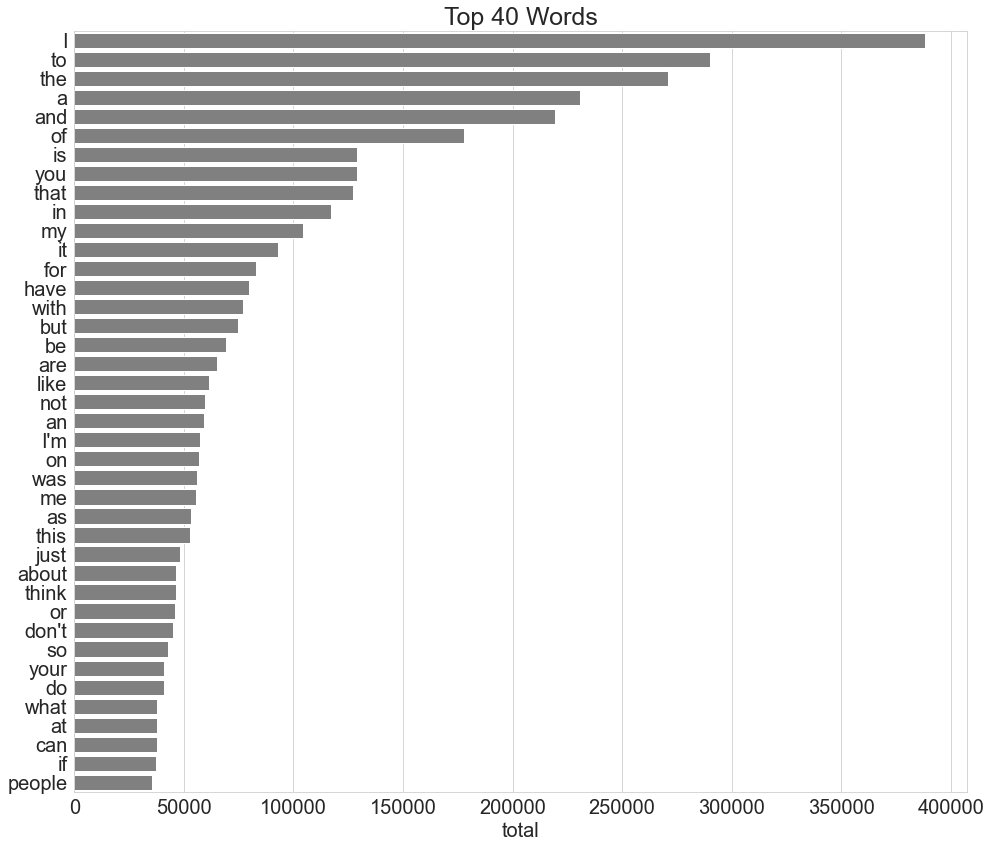

In [11]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(16,14))
ax = sns.barplot(x=df1.number, y=df1.words, data=df1, ci=None, color='grey',orient='h')
ax.set_title('Top 40 Words', fontsize=25)
ax.set_xlabel ("total", fontsize=20)
ax.set_ylabel (None)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

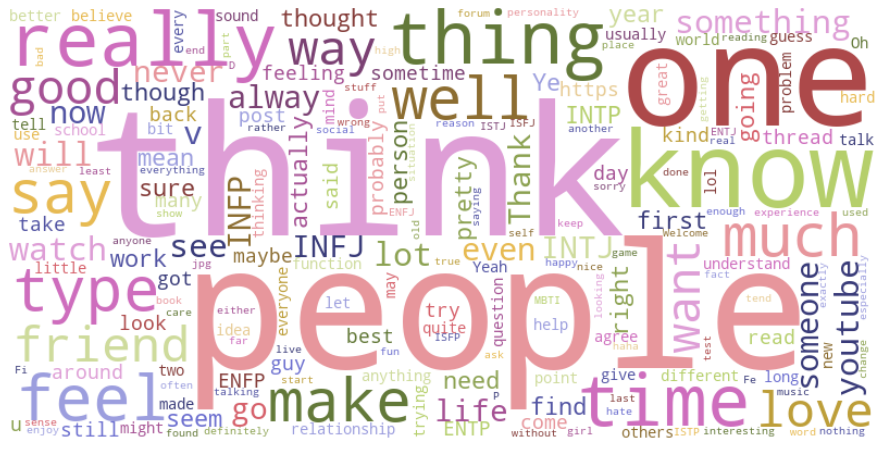

In [12]:
words = ' '.join((lang for lang in df.posts.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud(collocation_threshold=int(1e6), width=800, height=400, background_color='white', colormap="tab20b").generate(words)

plt.figure(figsize=(16,8))
plt.axis("off")
plt.grid(False)
plt.imshow(wc, interpolation='bilinear');

In [13]:
#number of users and posts
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append((posts[0], post))

posts = []
df.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(df))
print("Number of posts", len(posts))


Number of users 8675
Number of posts 422845


In [14]:
#total posts per user
round(422845/8675)

49

In [15]:
#number of posts by personality
total = df.groupby(['type']).count()*49
total = total.sort_values('posts', axis=0, ascending=False)
total

posts
type       
INFP  89768
INFJ  72030
INTP  63896
INTJ  53459
ENTP  33565
ENFP  33075
ISTP  16513
ISFP  13279
ENTJ  11319
ISTJ  10045
ENFJ   9310
ISFJ   8134
ESTP   4361
ESFP   2352
ESFJ   2058
ESTJ   1911

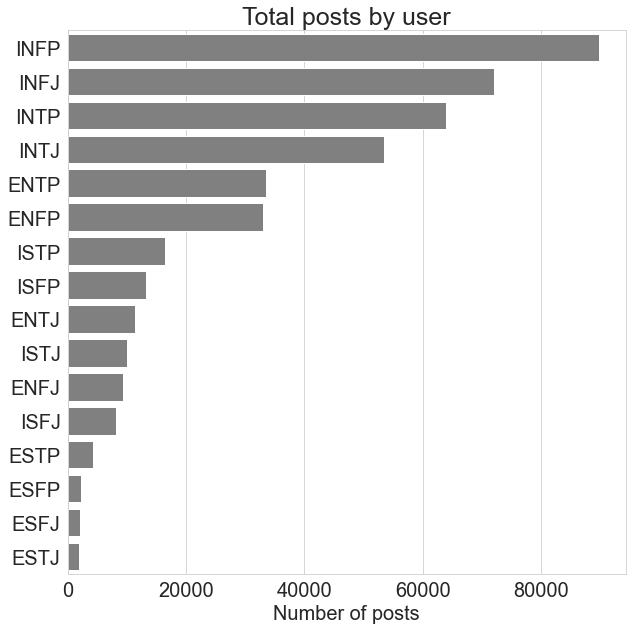

In [16]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x=total.posts, y=total.index, data=total, ci=None, color='grey',orient='h')
ax.set_title('Total posts by user', fontsize=25)
ax.set_xlabel ("Number of posts", fontsize=20)
ax.set_ylabel (None)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

C:\Users\Vanessa Onyema\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Lengths of all 49 Posts')

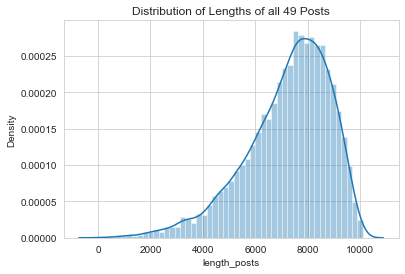

In [17]:
df["length_posts"] = df["posts"].apply(len)
sns.distplot(df["length_posts"]).set_title("Distribution of Lengths of all 49 Posts")

In [18]:
#remove links
df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))

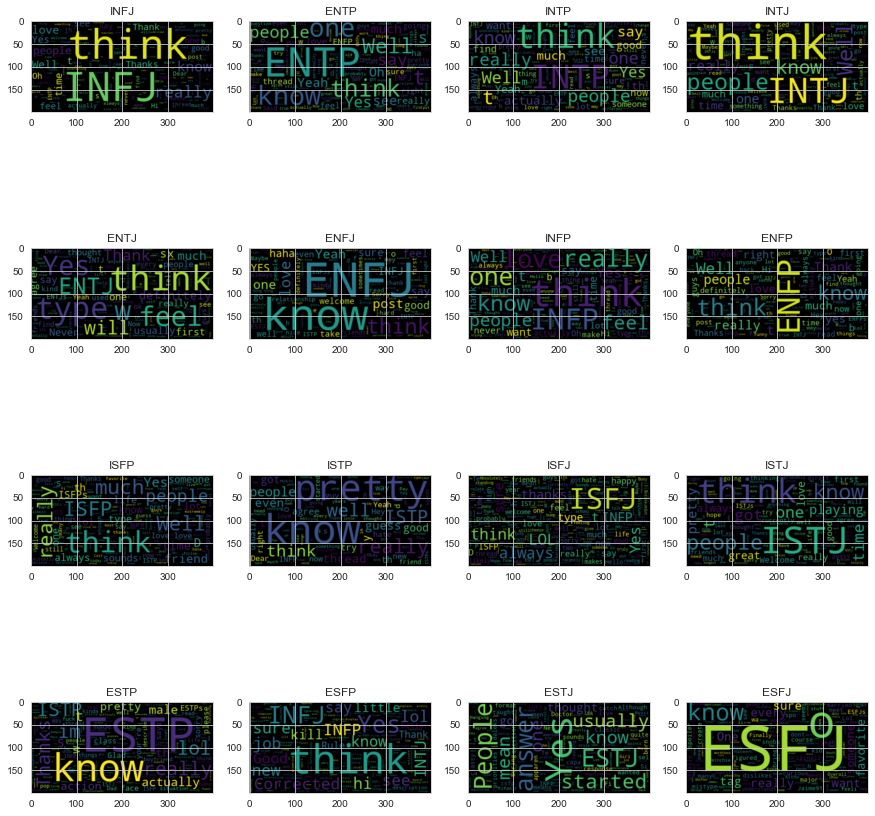

In [19]:
#according to personality
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,len(df['type'].unique())))
k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

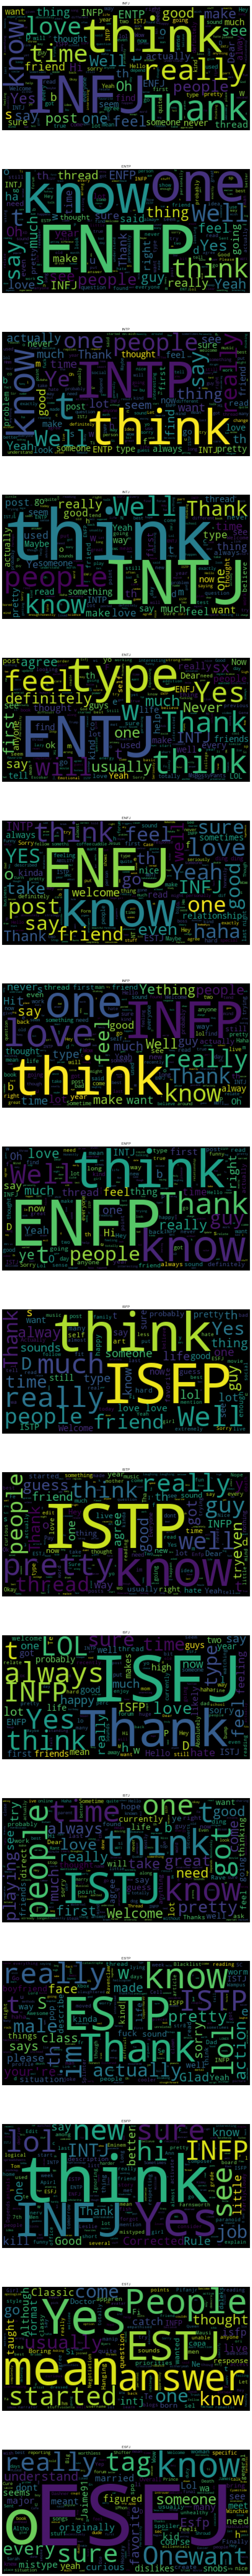

In [20]:
#according to personality (split)
fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,10*len(df['type'].unique())))

k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud().generate(df_4['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1